In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 7s 0us/step


In [7]:
data_dir

'./datasets/flower_photos'

In [8]:
import pathlib

In [9]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [11]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [14]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3872230296_6c477309f3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15277801151_5ed88f40f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5602220566_5cdde8fa6c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/21346056089_e6f8074e5f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8949720453_66e8304c30.jpg')]

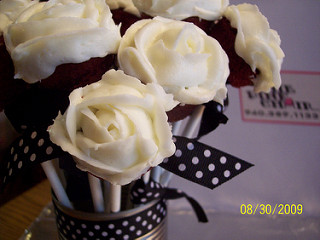

In [16]:
PIL.Image.open(str(roses[0]))

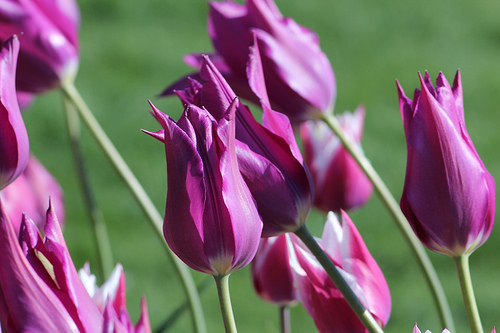

In [18]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

In [19]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [25]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [28]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 320, 3)

In [29]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [33]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resied_img = cv2.resize(img, (180,180))
        X.append(resied_img)
        y.append(flowers_labels_dict[flower_name])

In [35]:
y[0]

0

In [38]:
X = np.array(X)
y = np.array(y)

In [39]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/0c/2a/d3ff6091406bc2207e0adb832ebd15e40ac685811c7e2e3b432bfd969b71/scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/ef/1b/7538792254aec6850657d5b940fd05fe60582af829ffe40d6c054f065f34/scipy-1.11.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.me

In [40]:
from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
len(X_train)

2752

In [42]:
len(X_test)

918

In [43]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [45]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    # Flatten - 2D layer to one dimensional layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    
])

2023-11-04 13:15:13.798761: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-04 13:15:13.811950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-04 13:15:13.812102: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [46]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [47]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


2023-11-04 13:17:44.416991: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-11-04 13:17:45.031670: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f08bc797150 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-04 13:17:45.031688: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-11-04 13:17:45.037229: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-04 13:17:45.133444: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/86 [==============================] - 4s 14ms/step - loss: 1.3166 - accuracy: 0.4437
Epoch 2/30
86/86 [==============================] - 1s 14ms/step - loss: 0.9632 - accuracy: 0.6305
Epoch 3/30
86/86 [==============================] - 1s 14ms/step - loss: 0.7763 - accuracy: 0.7053
Epoch 4/30
86/86 [==============================] - 1s 14ms/step - loss: 0.5906 - accuracy: 0.7823
Epoch 5/30
86/86 [==============================] - 1s 14ms/step - loss: 0.3504 - accuracy: 0.8852
Epoch 6/30
86/86 [==============================] - 1s 14ms/step - loss: 0.1821 - accuracy: 0.9422
Epoch 7/30
86/86 [==============================] - 1s 14ms/step - loss: 0.0946 - accuracy: 0.9742
Epoch 8/30
86/86 [==============================] - 1s 14ms/step - loss: 0.0575 - accuracy: 0.9866
Epoch 9/30
86/86 [==============================] - 1s 14ms/step - loss: 0.0472 - accuracy: 0.9880
Epoch 10/30
86/86 [==============================] - 1s 13ms/step - loss: 0.0283 - accuracy: 0.9924
Epoch 11/30
86/86 [=

### Example of overfitting: train_accuracy: 0.9993; test_accuracy: 0,6765

In [49]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 0s 8ms/step - loss: 2.3664 - accuracy: 0.6765


[2.3664443492889404, 0.6764705777168274]

In [50]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 6ms/step


array([[  1.6769807 ,  10.995885  ,  -1.8873178 ,  -2.7339425 ,
          4.583857  ],
       [  9.203     ,  -7.2600183 ,  10.42004   ,  -6.2601285 ,
         -4.474967  ],
       [ -2.9690397 ,  -3.3604894 ,   2.0503802 ,  -0.93466187,
          1.565126  ],
       ...,
       [ -8.142088  ,  -9.114422  ,   2.3100932 ,  17.86059   ,
         -1.7026943 ],
       [ 11.932148  , -10.912569  ,  -9.913911  ,  -2.8569107 ,
         11.163663  ],
       [  0.1469373 , -13.446938  ,  12.968163  ,   8.263087  ,
         -1.4917119 ]], dtype=float32)

In [51]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8.9556794e-05, 9.9826789e-01, 2.5359655e-06, 1.0875734e-06,
       1.6388485e-03], dtype=float32)>

In [52]:
np.argmax(score)

1

In [53]:
y_test[0]

1

In [73]:
data_augmentation1 = keras.Sequential([
    tf.keras.layers.RandomZoom(0.3),
])

In [74]:
data_augmentation2 = keras.Sequential([
    tf.keras.layers.RandomContrast(0.3),
])

In [75]:
data_augmentation3 = keras.Sequential([
    tf.keras.layers.RandomRotation(0.3),
])

In [87]:
data_augmentation = keras.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
])

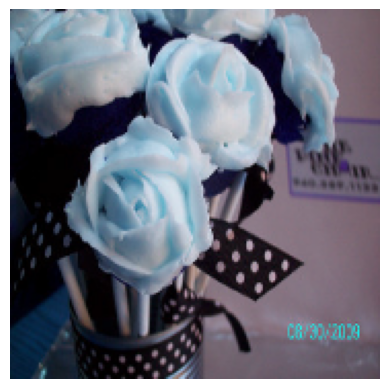

In [59]:
plt.axis('off')
plt.imshow(X[0])

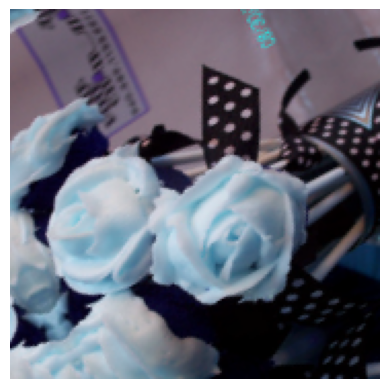

In [70]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [90]:
num_classes = 5

model = Sequential([
    data_augmentation3,
    layers.Conv2D(16, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    # Dropout - going to drop 20% of the neurons at random in each pass and it will give better generalization
    layers.Dropout(0.2),
    # Flatten - 2D layer to one dimensional layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


2023-11-04 14:00:26.965361: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_17/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


86/86 [==============================] - 3s 17ms/step - loss: 1.3074 - accuracy: 0.4226
Epoch 2/30
86/86 [==============================] - 2s 17ms/step - loss: 1.0469 - accuracy: 0.5774
Epoch 3/30
86/86 [==============================] - 1s 17ms/step - loss: 0.9878 - accuracy: 0.6119
Epoch 4/30
86/86 [==============================] - 1s 17ms/step - loss: 0.8911 - accuracy: 0.6483
Epoch 5/30
86/86 [==============================] - 1s 17ms/step - loss: 0.8475 - accuracy: 0.6646
Epoch 6/30
86/86 [==============================] - 1s 17ms/step - loss: 0.8026 - accuracy: 0.6853
Epoch 7/30
86/86 [==============================] - 1s 17ms/step - loss: 0.7569 - accuracy: 0.6969
Epoch 8/30
86/86 [==============================] - 1s 17ms/step - loss: 0.7490 - accuracy: 0.6991
Epoch 9/30
86/86 [==============================] - 1s 17ms/step - loss: 0.7030 - accuracy: 0.7307
Epoch 10/30
86/86 [==============================] - 1s 17ms/step - loss: 0.6978 - accuracy: 0.7227
Epoch 11/30
86/86 [=

In [91]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 0s 8ms/step - loss: 0.9230 - accuracy: 0.7179


[0.9230095148086548, 0.7178649306297302]